In [1]:
#ucitavamo osnovni, PCA i RFE trening skup

In [2]:
%store -r train_sets

In [3]:
%store -r test_sets

In [4]:
%store -r y_train

In [5]:
%store -r y_test

In [6]:
%store -r train_sets_KNN

In [7]:
%store -r test_sets_KNN

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
import time

In [10]:
from matplotlib import pyplot as plt

In [11]:
#desicion tree classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
params = {
            'criterion' : ['gini', 'entropy'],
            'min_samples_split' : [2, 3, 4, 5, 6]
         }

In [14]:
model_GS_DST = GridSearchCV(
    DecisionTreeClassifier(),
    params,
    scoring = 'accuracy',
    cv = 5,
    verbose = 4)

In [15]:
best_models_DST = {}
train_time_DST = {}
for train_set in train_sets:
    start_time = time.time()
    model_GS_DST.fit(train_sets[train_set], y_train)
    end_time = time.time()
    
    best_models_DST[train_set] = model_GS_DST.best_estimator_
    train_time_DST[train_set] = end_time - start_time
    print(train_time_DST[train_set])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, min_samples_split=2;, score=0.979 total time=   2.1s
[CV 2/5] END criterion=gini, min_samples_split=2;, score=0.979 total time=   2.1s
[CV 3/5] END criterion=gini, min_samples_split=2;, score=0.984 total time=   2.0s
[CV 4/5] END criterion=gini, min_samples_split=2;, score=0.983 total time=   2.0s
[CV 5/5] END criterion=gini, min_samples_split=2;, score=0.979 total time=   1.9s
[CV 1/5] END criterion=gini, min_samples_split=3;, score=0.979 total time=   2.0s
[CV 2/5] END criterion=gini, min_samples_split=3;, score=0.979 total time=   2.0s
[CV 3/5] END criterion=gini, min_samples_split=3;, score=0.985 total time=   2.0s
[CV 4/5] END criterion=gini, min_samples_split=3;, score=0.983 total time=   2.0s
[CV 5/5] END criterion=gini, min_samples_split=3;, score=0.978 total time=   1.9s
[CV 1/5] END criterion=gini, min_samples_split=4;, score=0.978 total time=   2.0s
[CV 2/5] END criterion=gini, min_samp

[CV 3/5] END criterion=entropy, min_samples_split=6;, score=0.964 total time=   1.3s
[CV 4/5] END criterion=entropy, min_samples_split=6;, score=0.961 total time=   1.2s
[CV 5/5] END criterion=entropy, min_samples_split=6;, score=0.960 total time=   1.3s
49.099586963653564
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, min_samples_split=2;, score=0.987 total time=   0.2s
[CV 2/5] END criterion=gini, min_samples_split=2;, score=0.992 total time=   0.2s
[CV 3/5] END criterion=gini, min_samples_split=2;, score=0.992 total time=   0.2s
[CV 4/5] END criterion=gini, min_samples_split=2;, score=0.992 total time=   0.2s
[CV 5/5] END criterion=gini, min_samples_split=2;, score=0.988 total time=   0.2s
[CV 1/5] END criterion=gini, min_samples_split=3;, score=0.987 total time=   0.2s
[CV 2/5] END criterion=gini, min_samples_split=3;, score=0.994 total time=   0.2s
[CV 3/5] END criterion=gini, min_samples_split=3;, score=0.991 total time=   0.2s
[CV 4/5] 

In [52]:
train_score_DST = []
test_score_DST = []
for best_model in best_models_DST:
    print(best_model, end = ": ")
    
    train_score = best_models_DST[best_model].score(train_sets[best_model], y_train)
    print(train_score, end = "; ")
    train_score_DST.append(train_score)
    
    test_score = best_models_DST[best_model].score(test_sets[best_model], y_test)
    print(test_score)
    test_score_DST.append(test_score)
    print(best_models_DST[best_model].get_params())

basic: 0.9998778998778999; 0.9886039886039886
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
PCA: 1.0; 0.964957264957265
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
RFE: 1.0; 0.9924216524216524
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Text(0.5, 1.0, 'Tacnost na test skupovima')

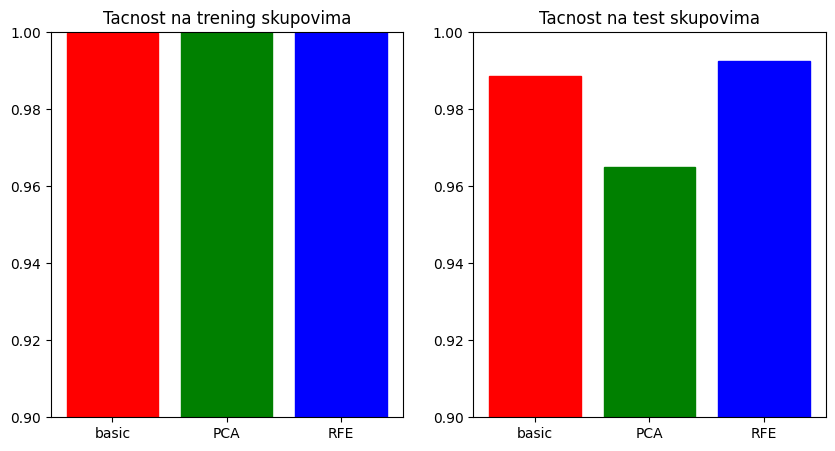

In [42]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
barlist1 = plt.bar(train_sets.keys(), train_score_DST)
barlist1[0].set_color('r')
barlist1[1].set_color('g')
barlist1[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Tacnost na trening skupovima')

fig.add_subplot(1, 2, 2)
barlist2 = plt.bar(test_sets.keys(), test_score_DST)
barlist2[0].set_color('r')
barlist2[1].set_color('g')
barlist2[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Tacnost na test skupovima')

In [18]:
#random forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
params = {
            'criterion' : ['gini', 'entropy'],
            'n_estimators' : [10, 50, 100]
         }

In [21]:
model_GS_RFC = GridSearchCV(
    RandomForestClassifier(),
    params,
    scoring = 'accuracy',
    cv = 5,
    verbose = 4
)

In [22]:
best_models_RFC = {}
train_time_RFC = {}
for train_set in train_sets:
    print(train_set)
    
    start_time = time.time()
    model_GS_RFC.fit(train_sets[train_set], y_train)
    end_time = time.time()
    
    best_models_RFC[train_set] = model_GS_RFC.best_estimator_
    train_time_RFC[train_set] = end_time - start_time
    print(train_time_RFC[train_set])

basic
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...criterion=gini, n_estimators=10;, score=0.997 total time=   2.0s
[CV 2/5] END ...criterion=gini, n_estimators=10;, score=0.997 total time=   2.0s
[CV 3/5] END ...criterion=gini, n_estimators=10;, score=0.998 total time=   2.0s
[CV 4/5] END ...criterion=gini, n_estimators=10;, score=0.997 total time=   1.7s
[CV 5/5] END ...criterion=gini, n_estimators=10;, score=0.996 total time=   1.8s
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=0.997 total time=   7.4s
[CV 2/5] END ...criterion=gini, n_estimators=50;, score=0.998 total time=   7.9s
[CV 3/5] END ...criterion=gini, n_estimators=50;, score=0.999 total time=   7.9s
[CV 4/5] END ...criterion=gini, n_estimators=50;, score=0.998 total time=   7.6s
[CV 5/5] END ...criterion=gini, n_estimators=50;, score=0.999 total time=   7.8s
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=0.997 total time=  15.8s
[CV 2/5] END ..criterion=gini, n_estimators

In [50]:
train_score_RFC = []
test_score_RFC = []
for best_model in best_models_RFC:
    print(best_model, end = ": ")
    
    train_score = best_models_RFC[best_model].score(train_sets[best_model], y_train)
    print(train_score, end = "; ")
    train_score_RFC.append(train_score)
    
    test_score = best_models_RFC[best_model].score(test_sets[best_model], y_test)
    print(test_score)
    test_score_RFC.append(test_score)
    print(best_models_RFC[best_model].get_params())

basic: 1.0; 0.9988603988603989
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
PCA: 1.0; 0.9926495726495727
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
RFE: 1.0; 0.9957264957264957
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 

Text(0.5, 1.0, 'Tacnost na test skupovima')

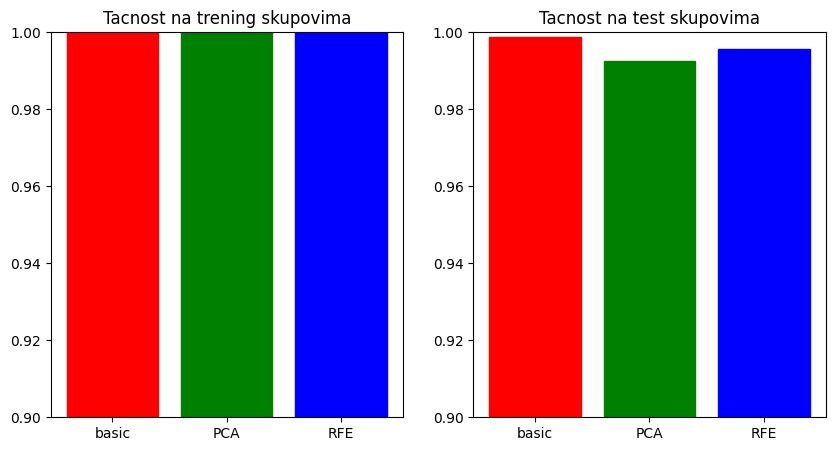

In [41]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
barlist1 = plt.bar(train_sets.keys(), train_score_RFC)
barlist1[0].set_color('r')
barlist1[1].set_color('g')
barlist1[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Tacnost na trening skupovima')

fig.add_subplot(1, 2, 2)
barlist2 = plt.bar(test_sets.keys(), test_score_RFC)
barlist2[0].set_color('r')
barlist2[1].set_color('g')
barlist2[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Tacnost na test skupovima')

In [25]:
#KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
params = {
            'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
         }

In [28]:
model_GS_KNN = GridSearchCV(
    KNeighborsClassifier(),
    params,
    scoring = 'accuracy',
    cv = 5,
    verbose = 4
)

In [29]:
best_models_KNN = {}
train_time_KNN = {}
for train_set in train_sets_KNN:
    print(train_set)
    
    start_time = time.time()
    model_GS_KNN.fit(train_sets_KNN[train_set], y_train)
    end_time = time.time()
    
    best_models_KNN[train_set] = model_GS_KNN.best_estimator_
    train_time_KNN[train_set] = end_time - start_time
    print(train_time_KNN[train_set])

normal
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.981 total time=   1.6s
[CV 2/5] END .....................n_neighbors=1;, score=0.980 total time=   1.4s
[CV 3/5] END .....................n_neighbors=1;, score=0.983 total time=   1.5s
[CV 4/5] END .....................n_neighbors=1;, score=0.980 total time=   1.9s
[CV 5/5] END .....................n_neighbors=1;, score=0.980 total time=   1.6s
[CV 1/5] END .....................n_neighbors=2;, score=0.978 total time=   2.4s
[CV 2/5] END .....................n_neighbors=2;, score=0.975 total time=   2.9s
[CV 3/5] END .....................n_neighbors=2;, score=0.979 total time=   2.8s
[CV 4/5] END .....................n_neighbors=2;, score=0.975 total time=   2.9s
[CV 5/5] END .....................n_neighbors=2;, score=0.975 total time=   3.2s
[CV 1/5] END .....................n_neighbors=3;, score=0.985 total time=   2.6s
[CV 2/5] END .....................n_neigh

[CV 1/5] END .....................n_neighbors=1;, score=0.998 total time=   0.5s
[CV 2/5] END .....................n_neighbors=1;, score=0.998 total time=   0.4s
[CV 3/5] END .....................n_neighbors=1;, score=0.998 total time=   0.5s
[CV 4/5] END .....................n_neighbors=1;, score=0.998 total time=   0.4s
[CV 5/5] END .....................n_neighbors=1;, score=0.998 total time=   0.5s
[CV 1/5] END .....................n_neighbors=2;, score=0.997 total time=   0.4s
[CV 2/5] END .....................n_neighbors=2;, score=0.997 total time=   0.5s
[CV 3/5] END .....................n_neighbors=2;, score=0.998 total time=   0.5s
[CV 4/5] END .....................n_neighbors=2;, score=0.997 total time=   0.5s
[CV 5/5] END .....................n_neighbors=2;, score=0.997 total time=   0.5s
[CV 1/5] END .....................n_neighbors=3;, score=0.997 total time=   0.4s
[CV 2/5] END .....................n_neighbors=3;, score=0.998 total time=   0.4s
[CV 3/5] END ...............

In [54]:
train_score_KNN = []
test_score_KNN = []
for best_model in best_models_KNN:
    print(best_model, end = ": ")
    
    train_score = best_models_KNN[best_model].score(train_sets_KNN[best_model], y_train)
    print(train_score, end = "; ")
    train_score_KNN.append(train_score)
    
    test_score = best_models_KNN[best_model].score(test_sets_KNN[best_model], y_test)
    print(test_score)
    test_score_KNN.append(test_score)
    print(best_models_KNN[best_model].get_params())

normal: 0.991037851037851; 0.9858689458689459
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
PCA: 0.9952625152625153; 0.9888319088319089
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
RFE: 1.0; 0.9977777777777778
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


Text(0.5, 1.0, 'Tacnost na test skupovima')

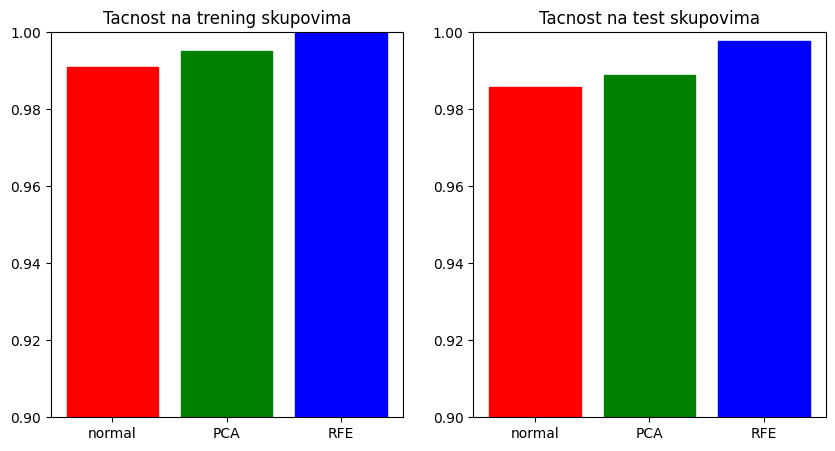

In [40]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(1, 2, 1)
barlist1 = plt.bar(train_sets_KNN.keys(), train_score_KNN)
barlist1[0].set_color('r')
barlist1[1].set_color('g')
barlist1[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Tacnost na trening skupovima')

fig.add_subplot(1, 2, 2)
barlist2 = plt.bar(test_sets_KNN.keys(), test_score_KNN)
barlist2[0].set_color('r')
barlist2[1].set_color('g')
barlist2[2].set_color('b')
plt.ylim([0.9, 1])
plt.title('Tacnost na test skupovima')

In [32]:
#zakljucci

In [33]:
#poredjenje razlicitih modela na RFE skupovima

In [34]:
best_models = [best_models_DST['RFE'], best_models_RFC['RFE'], best_models_KNN['RFE']]

In [35]:
best_test_sets = [test_sets['RFE'], test_sets['RFE'], test_sets_KNN['RFE']]

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [37]:
best_test_scores = []
for i in range(3):
    y_test_predict = best_models[i].predict(best_test_sets[i])
    
    print(accuracy_score(y_test_predict, y_test))
    print(precision_score(y_test_predict, y_test, average='weighted'))
    print(recall_score(y_test_predict, y_test, average='weighted'))
    print(f1_score(y_test_predict, y_test, average='weighted'))
    print(confusion_matrix(y_test_predict, y_test))
    
    test_score = accuracy_score(y_test_predict, y_test)
    best_test_scores.append(test_score)

0.9924216524216524
0.9924356137679922
0.9924216524216524
0.9924257673119559
[[1588    0    0    0    0   11    0    0    2    0    0]
 [   0 1577    0    0    0    0    0    0    4   15    0]
 [   0    0 1585    0    9    0    0    1    2    0    0]
 [   0    0    1 1595    2    0    0    1    0    0    0]
 [   0    0    8    1 1573    0    0    2    0    0    0]
 [   8    1    0    0    0 1565    0    0   15    0    0]
 [   0    0    0    0    0    0 1595    0    0    0    0]
 [   0    0    1    0   12    0    0 1591    1    0    0]
 [   0    2    1    0    0   19    0    0 1572    0    0]
 [   0   14    0    0    0    0    0    0    0 1580    0]
 [   0    0    0    0    0    0    0    0    0    0 1596]]
0.9957264957264957
0.9957347425050388
0.9957264957264957
0.9957281712254641
[[1592    0    0    0    0    2    0    0    1    0    0]
 [   0 1580    0    0    0    0    0    0    4    8    0]
 [   0    0 1590    1    6    0    0    0    0    0    0]
 [   0    0    0 1594    3    0    

In [38]:
best_train_times = [train_time_DST['RFE'], train_time_RFC['RFE'], train_time_KNN['RFE']]

Text(0.5, 1.0, 'RFE tacnost na test skupu')

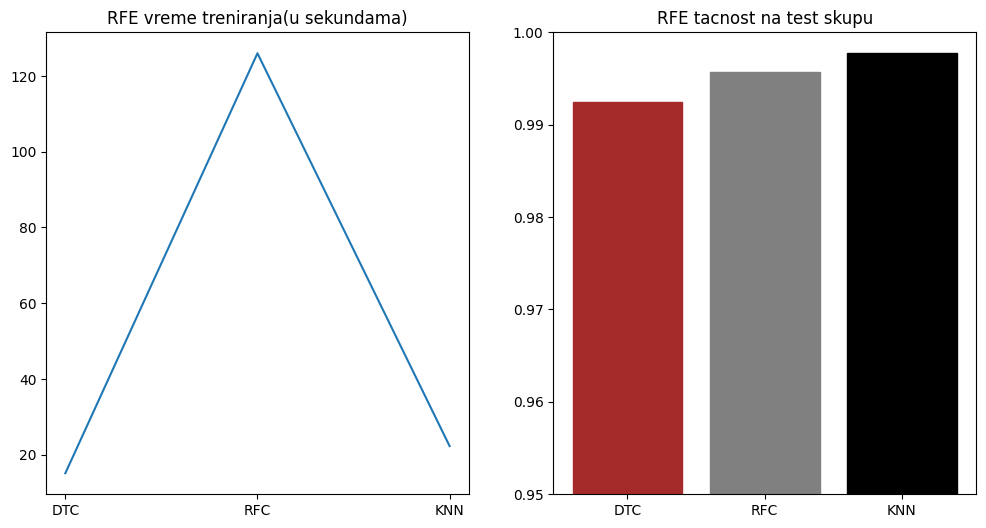

In [55]:
fig = plt.figure(figsize=(12, 6))

fig.add_subplot(1, 2, 1)
plt.plot(['DTC', 'RFC', 'KNN'], best_train_times)
#plt.ylim([0.95, 1])
plt.title('RFE vreme treniranja(u sekundama)')

fig.add_subplot(1, 2, 2)
barlist1 = plt.bar(['DTC', 'RFC', 'KNN'], best_test_scores)
barlist1[0].set_color('brown')
barlist1[1].set_color('gray')
barlist1[2].set_color('black')
plt.ylim([0.95, 1])
plt.title('RFE tacnost na test skupu')